#                             Spooky Author Identification

 by Akshata R Chalke, 01116014

## Objective 
**Task :** identify Authors from their writing style.

**Authors to be identified :** Edgar Allan Poe, Mary Shelley, HP Lovecraft

**Dataset :** text data from works of fiction written by spooky authors of public domain. 

**file :** 
     <li> data.csv
     

Data fields
 - id     - uniquee identifier for each sentence
 - text   - some text written by one of the authors
 - author - the author of the sentence (EAP : Edgar Allan Poe, HPL : HP lovecraft, MWS : Mary Wollstonecreaft Shelley)

#### 1. Importing the required libraries.

In [1]:
# import the libraries that we are gonna use
import numpy as np # used for performing algebraic operations
import pandas as pd # reading files 
import matplotlib.pyplot as plt # for visualising the data
import seaborn as sns # for visualising data
import string # used in case of punctuations
import re # used to work with regular expressions
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from subprocess import check_output
import nltk #natural language toolkit for NLP problems.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import parsing        # Help in preprocessing the data, very efficiently
import gensim
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 2. Loading the datasets.

In [2]:
train = pd.read_csv('data.csv')

print(train.head())

print("\nNo of rows in the data set : ",train.shape[0])

        id                                               text author
0  id26305  This process, however, afforded me no means of...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box, from wh...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else, not even gold, the Super...    HPL

No of rows in the data set :  19579


#### 3. Cleaning the data.

I was lucky enough to find the dataset that was already cleaned so, I din't have to specially clean the data.

In [3]:
## Check if there is any NULL values inside the dataset
print ("Null Value Statistics:", '\n \n', train.isnull().sum())

Null Value Statistics: 
 
 id        0
text      0
author    0
dtype: int64


#### 4. EDA (Exploratory Data Analysis)

We analyze the data by using simple statistics to understand the data and gain some insights. 
Some of the data insights could be following : 
- Find no of texts for each author.
- Find length of sentences.
- Find the Top common words used by each author

In [4]:
print("Id \t:", train.id[0])
print("Text\t:",train.text[0])
print("Author\t:",train.author[0])

Id 	: id26305
Text	: This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
Author	: EAP


In [5]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
id        19579 non-null object
text      19579 non-null object
author    19579 non-null object
dtypes: object(3)
memory usage: 459.0+ KB


#### Finding number of texts by each author

In [7]:
no_authors = train['author'].value_counts()
no_authors 

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

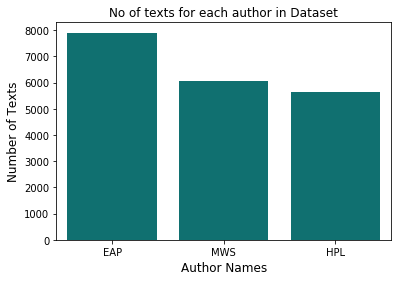

In [8]:
sns.barplot(no_authors.index, no_authors.values, color= 'teal')
plt.ylabel('Number of Texts', fontsize = 12)
plt.xlabel('Author Names', fontsize = 12)
plt.title('No of texts for each author in Dataset')
plt.show()

#### Finding length of the sentences. 
Now, lets count the number of words in each text mapped to the author and see who has texts with long senetences as well as short sentences.

In [9]:
train["words"] = train["text"].apply(lambda x: len(str(x).split()))
train.head()

,id,text,author,words
0,id26305,"This process, however, afforded me no means of...",EAP,41
1,id17569,It never once occurred to me that the fumbling...,HPL,14
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27


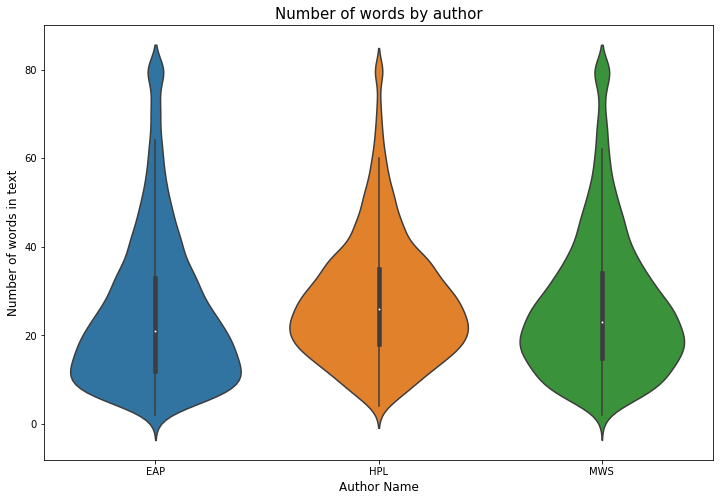

In [10]:
import warnings
warnings.filterwarnings('ignore')

train['words'].loc[train['words']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='author', y='words', data=train)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of words in text', fontsize=12)
plt.title("Number of words by author", fontsize=15)
plt.show()

In [11]:
del train["words"]
train.head()


,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


EAP seems slightly lesser number of words than MWS and HPL.

In [12]:
eap = train[train.author=='EAP']
hpl = train[train.author=='HPL']
mws = train[train.author=='MWS']

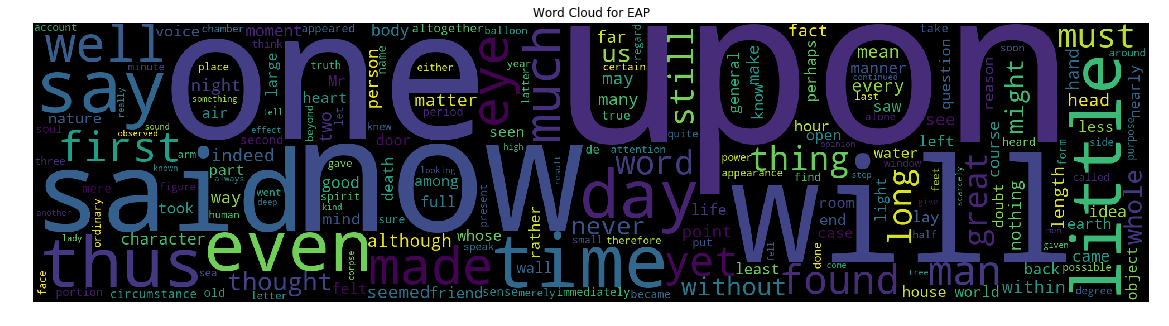

In [13]:
# For EAP

eap.text
dic= (' '.join(eap['text']))

wordcloud = WordCloud(width = 2000, height = 500, stopwords=STOPWORDS).generate(dic)

plt.figure(figsize=(20,10));
plt.imshow(wordcloud);
plt.axis('off');
plt.title('Word Cloud for EAP');


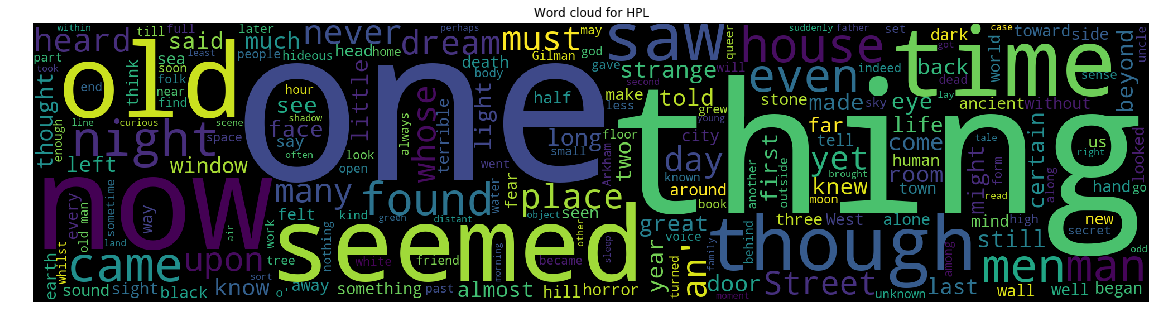

In [14]:
# For HPL

hpl.text
dic1 = ( ' '.join(hpl['text']))

wordcloud = WordCloud(width = 2000, height = 500, stopwords = STOPWORDS).generate(dic1)

plt.figure(figsize = (20,10));
plt.imshow(wordcloud);
plt.axis('off');
plt.title('Word cloud for HPL');

Text(0.5,1,'word cloud for MWS')

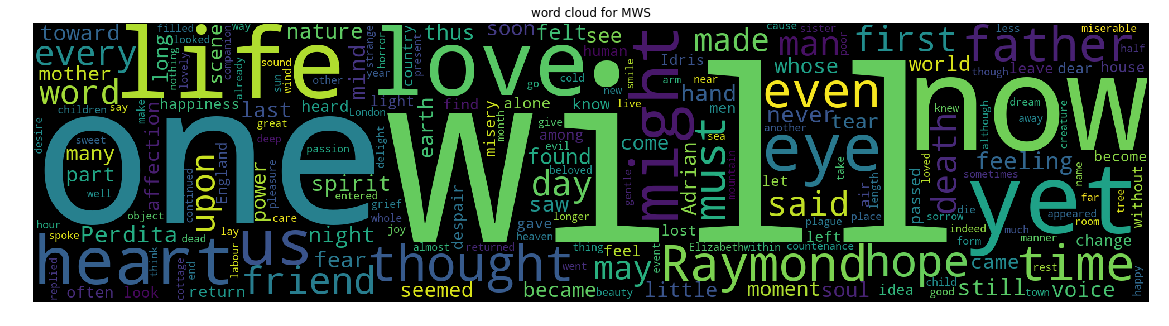

In [15]:
# For MWS

mws.text

dict2 = (' '.join(mws['text']))

wordcloud = WordCloud(width = 2000, height = 500, stopwords = STOPWORDS).generate(dict2)

plt.figure(figsize = (20,10));
plt.imshow(wordcloud);
plt.axis('off');
plt.title('word cloud for MWS')

I mapped "EAP" to 0 "HPL" to 1 and "MWS" to 2 as it will be more convenient for our classifier. In other words we are just telling our computer that if classifier predicts 0 for the text then it means that it is preicting "EAP", if 1 then it means that it is predicting "HPL", if 2 then it means that it is predicting 2.

In [16]:
## Collect all unique author names from author column
names = train['author'].unique()

name_to_id = {}
assign_id = 0
for name in names:
    name_to_id[name] = assign_id
    assign_id += 1  ## Get a new id for new author
    
##  Print the dictionary created
for key, values in name_to_id.items():
    print (key, values)

EAP 0
HPL 1
MWS 2


In [17]:
id_to_name = {v: k for k, v in name_to_id.items()}
for key, values in id_to_name.items():
    print (key, values)

0 EAP
1 HPL
2 MWS


In [18]:
## Add a new column to pandas dataframe, with the author name mapping
def get_id(name):
    return name_to_id[name]

train['author_id'] = train['author'].map(get_id)

In [19]:
train.head()

,id,text,author,author_id
0,id26305,"This process, however, afforded me no means of...",EAP,0
1,id17569,It never once occurred to me that the fumbling...,HPL,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,1


## Preprocessing the Data

I have used this package called gensim along with nltk to preprocess the data

In [20]:
## Tokenization

## Tokenization is splitting of given text data into tokens.

# Tokenization Example
sample = train['text'].values[0]
print(sample)
print('-----------------Tokenized sentence looks like below-----------------')
print(sample.split(" "))


This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
-----------------Tokenized sentence looks like below-----------------
['This', 'process,', 'however,', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon;', 'as', 'I', 'might', 'make', 'its', 'circuit,', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out,', 'without', 'being', 'aware', 'of', 'the', 'fact;', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall.']


In [21]:
sample_nltk = nltk.word_tokenize(sample)
print(sample_nltk)

['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']


In [22]:
## Stopwords removal

## if we see closely there are words which can be redundant while using the above words for prediction, 
##As they might create bias in the model with their high frequency.
## All such words are called as stop words which include words like 'a','to','the' etc. 
##there fore it would be benefit for us if we remove them in preprocessing phase.

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(word_list):
    new_word_list = []
    for word in word_list: # iterate over the words
        if word.lower() not in stopwords: ## convert the word to lowercase as this will simplyfy the process
            new_word_list.append(word)
    return new_word_list
new_words = remove_stopwords(sample_nltk)

print(sample_nltk)
print('----------------------------After Stop Words Removal------------------------------------')
print(new_words)

['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']
----------------------------After Stop Words Removal------------------------------------
['process', ',', 'however', ',', 'afforded', 'means', 'ascertaining', 'dimensions', 'dungeon', ';', 'might', 'make', 'circuit', ',', 'return', 'point', 'whence', 'set', ',', 'without', 'aware', 'fact', ';', 'perfectly', 'uniform', 'seemed', 'wall', '.']


gensim is a tool for discovering the semantic structure of documents by examining the patterns of words (or higher-level structures such as entire sentences or documents). gensim accomplishes this by taking a corpus, a collection of text documents, and producing a vector representation of the text in the corpus. 

In [23]:
def transform(text):
    
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # Convert text to lower
    text = text.lower()
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in stops]
    
    # Removing all the tokens with lesser than 3 characters
    filtered_words = gensim.corpora.textcorpus.remove_short(filtered_words, minsize=3)
    
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    
    # Strip all the numerics
    text = gensim.parsing.preprocessing.strip_numeric(text)
        
    # Stemming
    return gensim.parsing.preprocessing.stem_text(text)

In [24]:
train['text'] = train['text'].map(transform)


In [25]:
## Print a couple of rows after the preprocessing of the data is done

print (train['text'][0] , '\n')
print (train['text'][1] , '\n')
print (train['text'][2])

process howev afford mean ascertain dimens dungeon might make circuit return point whenc set out without awar fact perfectli uniform seem wall 

never occur fumbl might mere mistak 

left hand gold snuff box which caper hill cut manner fantast step took snuff incessantli air greatest possibl self satisfact


### Modelling

As this is a classification problem, we will use NB for modelling.

We will be dividing data into (Train, Test). So that we can evaluate the model

In [26]:

X_train, X_test, y_train, y_test = train_test_split(train['text'], train['author_id'], 
                                                    test_size=0.33, random_state=42)

In [27]:
print ("Training Sample Size:", len(X_train), ' ', "Test Sample Size:" ,len(X_test))

Training Sample Size: 13117   Test Sample Size: 6462


In [28]:
count_vect = CountVectorizer() #Convert a collection of text documents to a matrix of token counts
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(13117, 13640)

In [29]:
# for concept explanation we will take some sample data
example = ['Machine Learning is part of Artificial Intelligence','Deep Learning is part of machine learning']

count_vectorizer = CountVectorizer(min_df = 0) # without Stopwords Removal

transformed_sentence = count_vectorizer.fit_transform(example)
#counting frequency of terms
#print(count_vectorizer.get_feature_names())
#print(transformed_sentence.toarray())
dtm_count_vectorizer = pd.DataFrame(transformed_sentence.toarray(),index=example,
                                    columns = count_vectorizer.get_feature_names())

dtm_count_vectorizer


,artificial,deep,intelligence,is,learning,machine,of,part
Machine Learning is part of Artificial Intelligence,1,0,1,1,1,1,1,1
Deep Learning is part of machine learning,0,1,0,1,2,1,1,1


TF-IDF

Term Frequency - Inverse Document Frequency it makes sure that less importance is given to most frequent words and also considers less frequent words.

Term Frequency is number of times a particular word(W) occurs in a review divided by total number of words (Wr) in review. The term frequency value ranges from 0 to 1.

Inverse Document Frequency is calculated as ln(Total Number of Docs(N) / Number of Docs which contains particular word(n)). Here Docs referred as Reviews.

TF-IDF is TF x IDF that is (W/Wr) x (ln(N/n + 1) + 1)


In [30]:
tfidf_vectorizer = TfidfVectorizer() #without Stopwords removal

# if we apply tf-idf for the same data given above we can see the difference between both the outputs

transformed_tfidf = tfidf_vectorizer.fit_transform(example)

dtm_tfidf_vectorizer = pd.DataFrame(transformed_tfidf.toarray(),index=example,
                                    columns = tfidf_vectorizer.get_feature_names())

dtm_tfidf_vectorizer

,artificial,deep,intelligence,is,learning,machine,of,part
Machine Learning is part of Artificial Intelligence,0.469778,0.000000,0.469778,0.334251,0.334251,0.334251,0.334251,0.334251
Deep Learning is part of machine learning,0.000000,0.444996,0.000000,0.316619,0.633237,0.316619,0.316619,0.316619


In [31]:
## Get the TF-IDF vector representation of the data
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
#Transform a count matrix to a normalized tf or tf-idf representation

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [32]:
print ('Dimension of TF-IDF vector :' , X_train_tfidf.shape)

Dimension of TF-IDF vector : (13117, 13640)


#### using BernoulliNB

In [33]:
# training a classifier

clf = BernoulliNB().fit(X_train_tfidf, y_train)

X_new_counts = count_vect.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

## predictions for first 10 test samples
counter  = 0
for doc, category in zip(X_test, predicted):
    print('%r => %s' % ((doc, id_to_name[category])))
    if(counter == 10):
        break
    counter += 1  
   

'gigant magnitud immedi avail natur sum dazzl bewild thought upon topic' => EAP
'shall disturb calm mingl world' => MWS
'seen mani custom wit great varieti moral creed oblig form independ on relat peculiar notion on countri earli prejudic cours influenc judgement format principl raw colledg idea strang mingl deepest deduct penetr mind' => MWS
'went stair chamber bodi mademoisel l espanay found deceas still lai' => EAP
'horror evil moon hung low puffi worm sea need moon feed by' => EAP
'listen done narrat adventur sometim took interest speci inform not did look integr part be obtain could put univers sens touch' => MWS
'chief amus gun fish saunter along beach myrtl quest shell entomolog specimen collect latter might envi swammerdamm' => HPL
'slightest fear result' => EAP
'content sai addit tempera sanguin rash ardent enthusiast life devot admir women' => MWS
'effort fruitless' => EAP
'new countri get us it' => EAP


In [34]:
# evaluation
np.mean(predicted == y_test) 

0.8184772516248839

#### MultinomialNB

In [35]:
# training a classifier

clf = MultinomialNB ().fit(X_train_tfidf, y_train)

#The difference is that while MultinomialNB works with occurrence counts, 
#BernoulliNB is designed for binary/boolean features.

X_new_counts = count_vect.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

## predictions for first 10 test samples
counter  = 0
for doc, category in zip(X_test, predicted):
    print('%r => %s' % ((doc, id_to_name[category])))
    if(counter == 10):
        break
    counter += 1  
    

'gigant magnitud immedi avail natur sum dazzl bewild thought upon topic' => EAP
'shall disturb calm mingl world' => MWS
'seen mani custom wit great varieti moral creed oblig form independ on relat peculiar notion on countri earli prejudic cours influenc judgement format principl raw colledg idea strang mingl deepest deduct penetr mind' => EAP
'went stair chamber bodi mademoisel l espanay found deceas still lai' => EAP
'horror evil moon hung low puffi worm sea need moon feed by' => EAP
'listen done narrat adventur sometim took interest speci inform not did look integr part be obtain could put univers sens touch' => EAP
'chief amus gun fish saunter along beach myrtl quest shell entomolog specimen collect latter might envi swammerdamm' => HPL
'slightest fear result' => EAP
'content sai addit tempera sanguin rash ardent enthusiast life devot admir women' => MWS
'effort fruitless' => EAP
'new countri get us it' => EAP


In [36]:
# evaluation
np.mean(predicted == y_test) 

0.8093469514082328

Text(91.68,0.5,'predicted label')

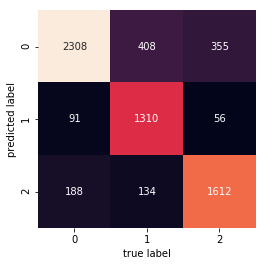

In [37]:
mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### References :

* https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/gensim%20Quick%20Start.ipynb
* https://datasciencedojo.com/spooky-author-identification-eda/
* https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python#required-materials
* https://medium.com/ds3ucsd/kaggle-session-5-spooky-authors-notebook-79d53800946b
* https://www.kaggle.com/shashanksai/text-preprocessing-using-python